In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas
import numpy

In [3]:
data = pandas.read_csv('./lhcb_pid.csv')

In [4]:
data.head()

,Unnamed: 0,TrackP,Proba
0,0,35641.250000,0.288490
1,1,10652.150391,0.606991
2,2,10065.379883,0.552184
3,3,14108.240234,0.556046
4,4,6859.060059,0.282791


In [5]:
pt = 1. / data.TrackP.values
proba = data.Proba.values

In [6]:
from utils import compute_cvm

In [7]:
compute_cvm(proba, pt)

0.014072677279574083

In [9]:
cvm_pdf = []
for step in range(1000):
    proba_rand = numpy.random.random(len(proba))
    cvm_pdf.append(compute_cvm(proba_rand, pt))

In [10]:
len(cvm_pdf)

1000

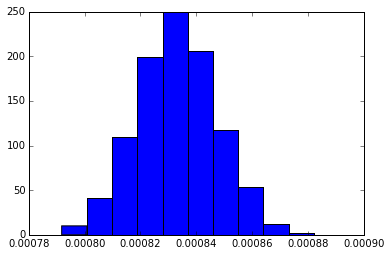

In [11]:
hist(cvm_pdf)
pass

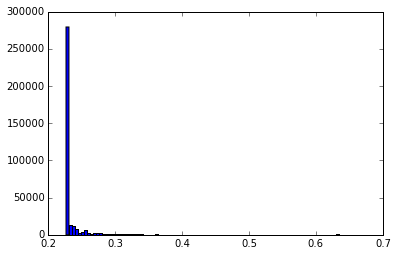

In [12]:
hist(proba, bins=100)
pass

In [13]:
from rep.utils import get_efficiencies
from rep.plotting import ErrorPlot

eff = get_efficiencies(proba, pt, bins_number=30, errors=True, ignored_sideband=0)
plot_fig = ErrorPlot(eff)
plot_fig.xlabel = '1 / Pt'
plot_fig.ylabel = 'Efficiency'
plot_fig.title = 'Flatness'
plot_fig.ylim = (0, 1)

/Users/antares/.virtualenvs/rep/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


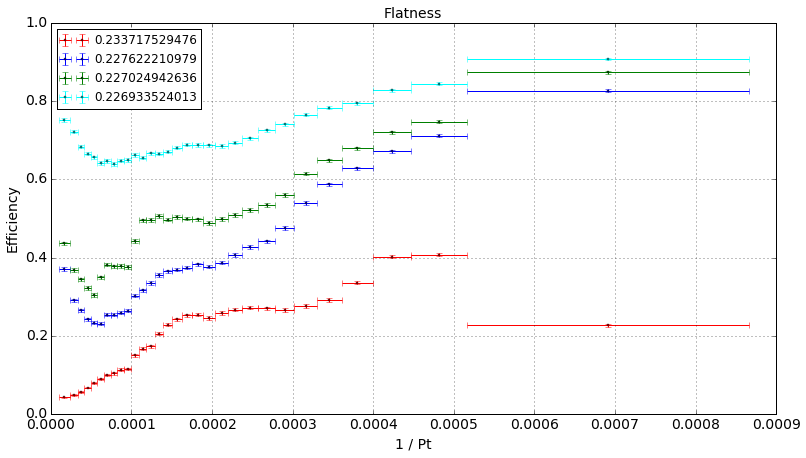

In [14]:
plot_fig.plot(new_plot=True)